In [1]:
pip install pandas scipy

In [2]:
import pandas as pd
from scipy import stats

# Assuming you have a CSV file named 'dataset.csv' with a column named 'values'
# Replace 'values' with the actual column name containing the continuous values

# Read the CSV file
df = pd.read_csv('Book1.csv')

In [3]:
import pandas as pd

print(df.head())

   Message count        Date Time Stamp Time Interval (HH:MM)  \
0              1  09/22/2023       7:01                  0:00   
1              2  09/22/2023       7:04                  0:03   
2              3  09/22/2023       7:09                  0:05   
3              4  09/22/2023       7:15                  0:06   
4              5  09/22/2023       7:28                  0:13   

   Time Interval (Hour in Number)  
0                         0.00000  
1                         0.05000  
2                         0.08333  
3                         0.10000  
4                         0.21667  


In [4]:
column_sum = df['Time Interval (Hour in Number)'].sum()

print(f"The sum of the column 'values' is: {column_sum}")

The sum of the column 'values' is: 9.866690000000002


In [5]:
data = df['Time Interval (Hour in Number)']

# Find the minimum and maximum values
min_value = data.min()
max_value = data.max()

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")


Minimum Value: 0.0
Maximum Value: 0.45


In [6]:
missing_values = df['Time Interval (Hour in Number)'].isnull().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [7]:
import numpy as np

sample_mean = np.mean(data)

# Calculate sample median
sample_median = np.median(data)

# Calculate sample standard deviation
sample_std_dev = np.std(data, ddof=1)

# Calculate sample range
sample_range = np.ptp(data)

try:
    mode_value = mode(data)
except:
    mode_value = "No unique mode"

print(f"Sample Mean: {sample_mean}")
print(f"Sample Median: {sample_median}")
print(f"Sample Standard Deviation: {sample_std_dev}")
print(f"Sample Range: {sample_range}")
print(f"Mode: {mode_value}")

Sample Mean: 0.07893352000000002
Sample Median: 0.05
Sample Standard Deviation: 0.08290600571903022
Sample Range: 0.45
Mode: No unique mode


In [ ]:
import numpy as np

# Assuming you have a numpy array 'data' or a pandas Series 'data'
# If not, you can load your dataset into a DataFrame and extract the column

# Calculate quartiles and IQR
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # This is the median
q3 = np.percentile(data, 75)
iqr = q3 - q1

print(f"Q1 = {q1}")
print(f"Q2 = {q2}")
print(f"Q3 = {q3}")
print(f"IQR = {iqr}")

Q1 = 0.03333
Q2 = 0.05
Q3 = 0.08333
IQR = 0.05


In [ ]:
import matplotlib.pyplot as plt

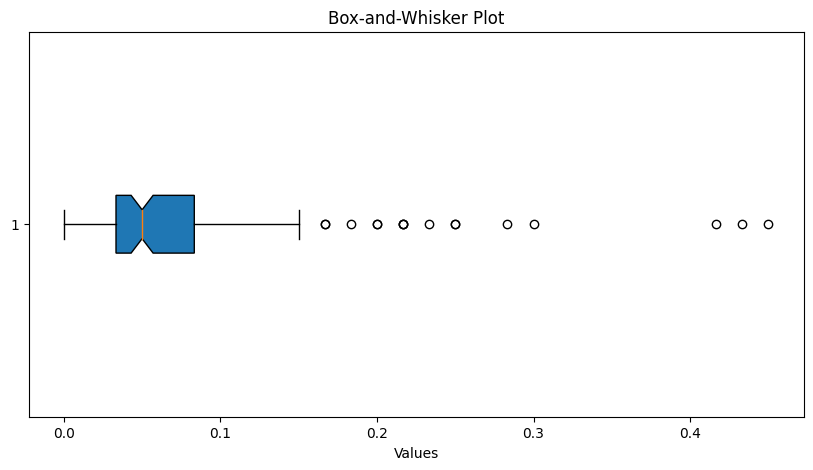

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(data, vert=False, notch=True, patch_artist=True)
plt.title('Box-and-Whisker Plot')
plt.xlabel('Values')
plt.show()

In [ ]:
frequency_table = data.value_counts().reset_index()
frequency_table.columns = ['Value', 'Frequency']

print(frequency_table)

      Value  Frequency
0   0.05000         23
1   0.06667         21
2   0.03333         20
3   0.01667         12
4   0.10000         11
5   0.00000         10
6   0.08333          9
7   0.21667          3
8   0.25000          2
9   0.20000          2
10  0.15000          2
11  0.16667          2
12  0.23333          1
13  0.28333          1
14  0.43333          1
15  0.18333          1
16  0.11667          1
17  0.45000          1
18  0.41667          1
19  0.30000          1


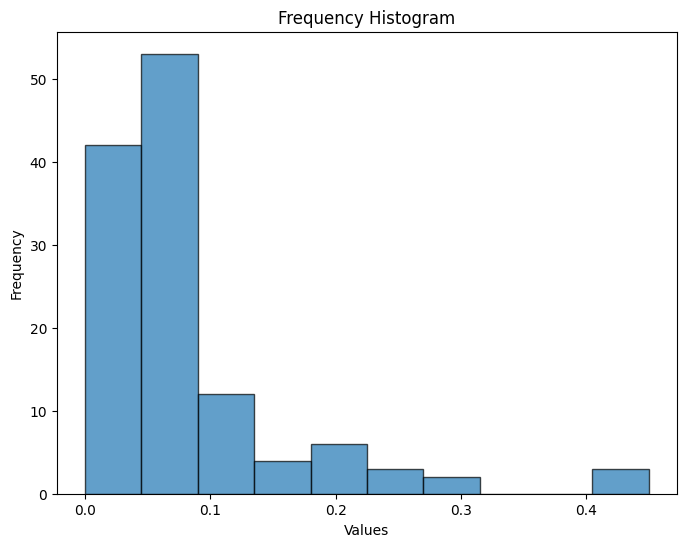

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Frequency Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
num_bins = 10  # You can change this value as needed

# Create the frequency table with class intervals
frequency_table = pd.cut(data, bins=num_bins, include_lowest=True, right=True, retbins=False)
frequency_table = pd.value_counts(frequency_table, sort=False).reset_index()
frequency_table.columns = ['Class Interval', 'Count']

# Calculate relative frequency
frequency_table['Relative Frequency'] = frequency_table['Count'] / len(data)

# Calculate cumulative relative frequency
frequency_table['Cumulative Relative Frequency'] = frequency_table['Relative Frequency'].cumsum()

# Print the tabular summary
print(frequency_table)

      Class Interval  Count  Relative Frequency  Cumulative Relative Frequency
0  (-0.00145, 0.045]     42               0.336                          0.336
1      (0.045, 0.09]     53               0.424                          0.760
2      (0.09, 0.135]     12               0.096                          0.856
3      (0.135, 0.18]      4               0.032                          0.888
4      (0.18, 0.225]      6               0.048                          0.936
5      (0.225, 0.27]      3               0.024                          0.960
6      (0.27, 0.315]      2               0.016                          0.976
7      (0.315, 0.36]      0               0.000                          0.976
8      (0.36, 0.405]      0               0.000                          0.976
9      (0.405, 0.45]      3               0.024                          1.000


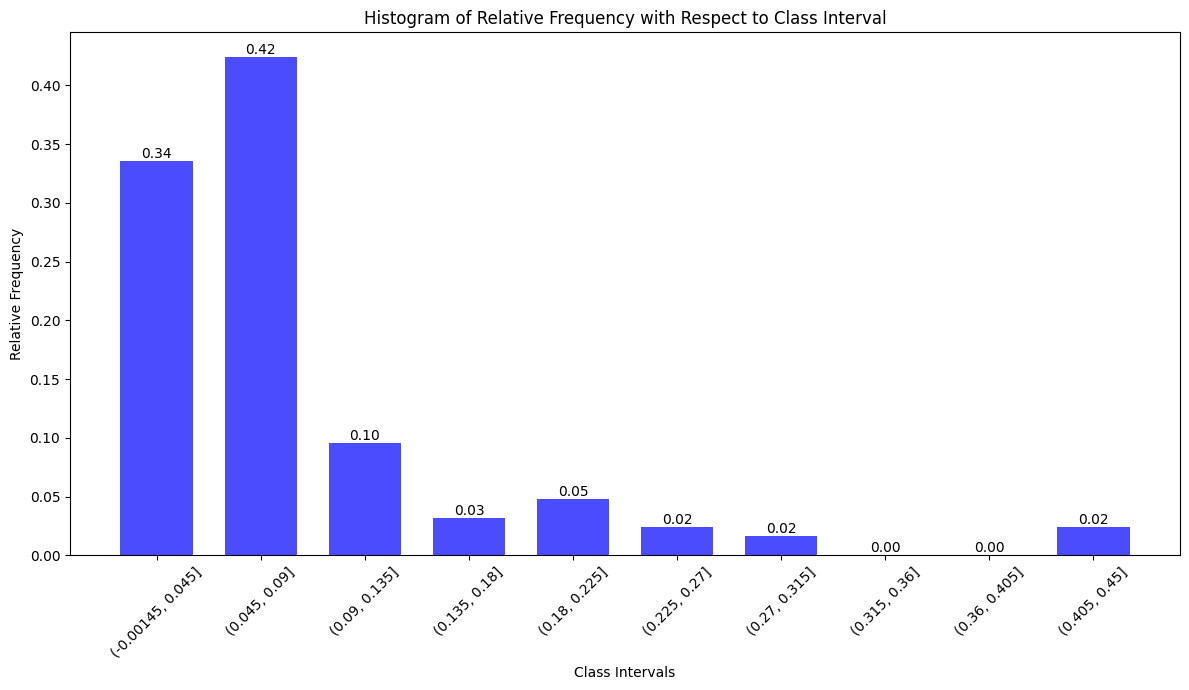

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have class_intervals and relative_frequencies

# Create the histogram
plt.figure(figsize=(12, 7))
bars = plt.bar(class_intervals, relative_frequencies, width=0.7, align='center', alpha=0.7, color='blue')

# Add relative frequency labels on top of each bar
for bar, freq in zip(bars, relative_frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{freq:.2f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Relative Frequency with Respect to Class Interval')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


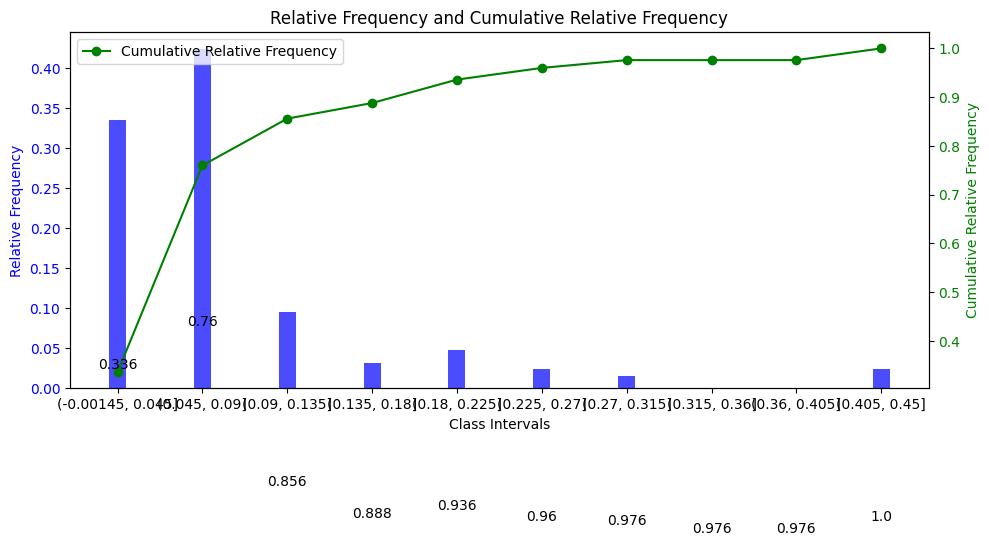

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'frequency_table' DataFrame from the previous code
# If not, replace this with your actual frequency table

# Convert class intervals to strings
class_intervals = frequency_table['Class Interval'].astype(str)
relative_frequencies = frequency_table['Relative Frequency']
cumulative_relative_frequencies = frequency_table['Cumulative Relative Frequency']

# Create the figure and the first axis (for relative frequencies)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart for relative frequencies
bars = ax1.bar(class_intervals, relative_frequencies, width=0.2, align='center', alpha=0.7, color='blue')
ax1.set_xlabel('Class Intervals')
ax1.set_ylabel('Relative Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second axis (for cumulative relative frequencies)
ax2 = ax1.twinx()
line = ax2.plot(class_intervals, cumulative_relative_frequencies, marker='o', color='green', linestyle='-', label='Cumulative Relative Frequency')
ax2.set_ylabel('Cumulative Relative Frequency', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add cumulative frequency labels on top of each bar
for bar, freq in zip(bars, cumulative_relative_frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(freq, 6), va='bottom', ha='center', color='black', fontsize=10)

# Combine legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Set title
plt.title('Relative Frequency and Cumulative Relative Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

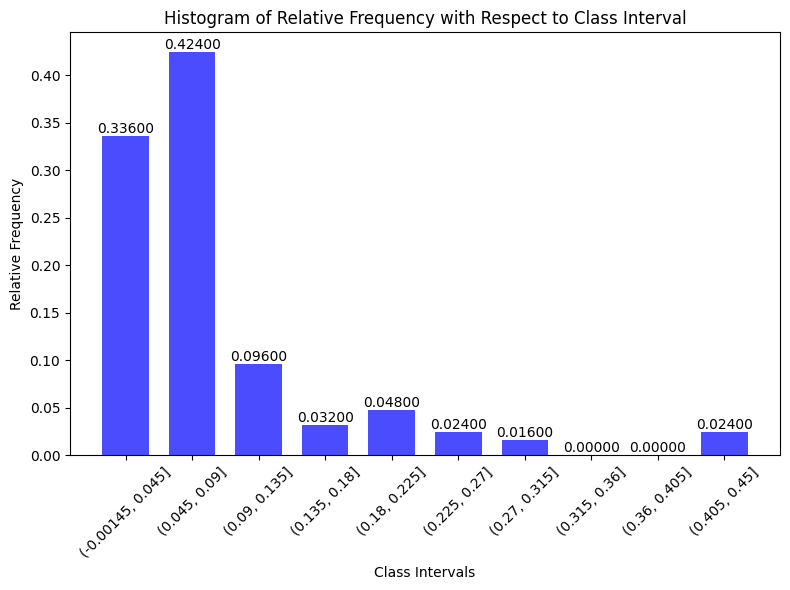

In [ ]:
class_intervals = frequency_table['Class Interval'].astype(str)
relative_frequencies = frequency_table['Relative Frequency']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(class_intervals, relative_frequencies, width=0.7, align='center', alpha=0.7, color='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Relative Frequency with Respect to Class Interval')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

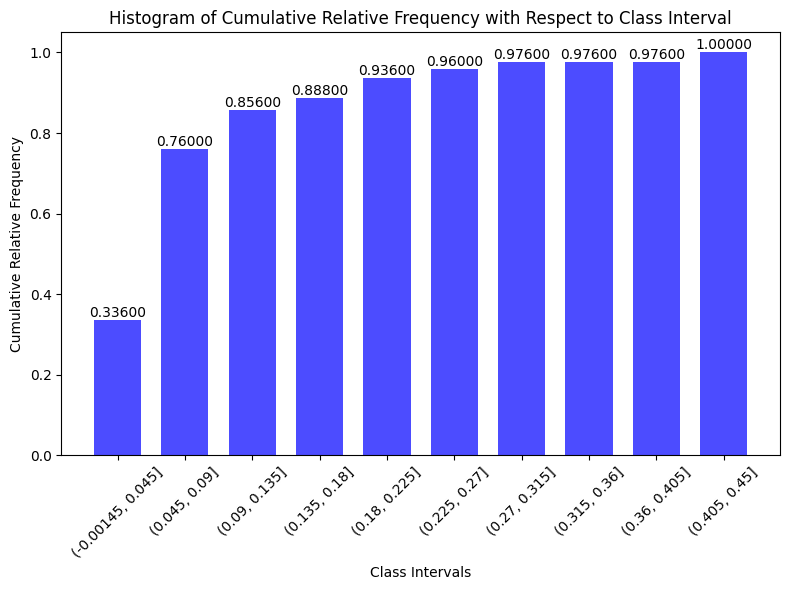

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have class_intervals and cumulative_relative_frequencies

# Create the histogram
plt.figure(figsize=(8, 6))
bars = plt.bar(class_intervals, cumulative_relative_frequencies, width=0.7, align='center', alpha=0.7, color='blue')

# Add cumulative frequency labels at the top of each bar
for bar, freq in zip(bars, cumulative_relative_frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{freq:.5f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Cumulative Relative Frequency')
plt.title('Histogram of Cumulative Relative Frequency with Respect to Class Interval')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
min_value = data.min()
max_value = data.max()

# Calculate the sample range
sample_range = max_value - min_value

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Sample Range: {sample_range}")


Minimum Value: 0.0
Maximum Value: 0.45
Sample Range: 0.45
